## Задание 1: Сравнение CNN и полносвязных сетей (40 баллов)

### 1.1 Сравнение на MNIST (20 баллов)
```python
# Сравните производительность на MNIST:
# - Полносвязная сеть (3-4 слоя)
# - Простая CNN (2-3 conv слоя)
# - CNN с Residual Block
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность на train и test множествах
# - Измерьте время обучения и инференса
# - Визуализируйте кривые обучения
# - Проанализируйте количество параметров
```

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import torch
from convolutional_basics.datasets import get_mnist_loaders
from convolutional_basics.models import SimpleCNN, CNNWithResidual
from convolutional_basics.trainer import train_model
from convolutional_basics.utils import plot_training_history, count_parameters, compare_models
import sys
from matplotlib import pyplot as plt
from pathlib import Path

In [23]:
device = torch.device('cpu')
train_loader, test_loader = get_mnist_loaders(batch_size=64)

In [24]:
current_dir = Path.cwd()
project_root = current_dir.parent
fc_models_path = project_root / "lesson3-fc-models" / "fully_connected_basics"
sys.path.insert(0, str(fc_models_path))
from models import FullyConnectedModel  

In [ ]:
FC_model = FullyConnectedModel(
    input_size=784,
    num_classes=10,
    layers=[
        {"type": "linear", "size": 512},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 256},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
            
        {"type": "linear", "size": 128},
        {"type": "batch_norm"},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.3},
    ]
).to(device)
print(f"FC-Model parameters: {count_parameters(FC_model)}")

print("Training FC-model...")
FC_history = train_model(FC_model, train_loader, test_loader, epochs=5, device=str(device))

FC-Model parameters: 569226
Training FC-model...


100%|██████████| 157/157 [00:02<00:00, 69.37it/s]


Epoch 1/5:
Train Loss: 0.2943, Train Acc: 0.9172
Test Loss: 0.1026, Test Acc: 0.9670
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.05it/s]


Epoch 2/5:
Train Loss: 0.1472, Train Acc: 0.9564
Test Loss: 0.0813, Test Acc: 0.9746
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 70.32it/s]


Epoch 3/5:
Train Loss: 0.1184, Train Acc: 0.9640
Test Loss: 0.0687, Test Acc: 0.9788
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.76it/s]


Epoch 4/5:
Train Loss: 0.1013, Train Acc: 0.9682
Test Loss: 0.0650, Test Acc: 0.9798
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.86it/s]

Epoch 5/5:
Train Loss: 0.0882, Train Acc: 0.9725
Test Loss: 0.0613, Test Acc: 0.9806
--------------------------------------------------


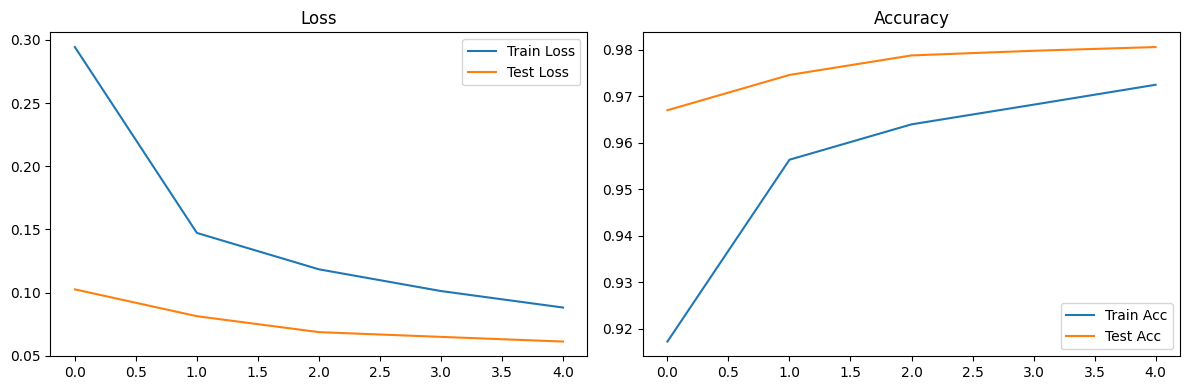

In [44]:
plot_training_history(FC_history)

In [26]:
simple_cnn = SimpleCNN(input_channels=1, num_classes=10).to(device)
print(f"Simple CNN parameters: {count_parameters(simple_cnn)}")

print("Training Simple CNN...")
simple_history = train_model(simple_cnn, train_loader, test_loader, epochs=5, device=str(device))

Simple CNN parameters: 421642
Training Simple CNN...


100%|██████████| 157/157 [00:04<00:00, 38.23it/s]


Epoch 1/5:
Train Loss: 0.1518, Train Acc: 0.9529
Test Loss: 0.0371, Test Acc: 0.9874
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 40.71it/s]


Epoch 2/5:
Train Loss: 0.0518, Train Acc: 0.9839
Test Loss: 0.0309, Test Acc: 0.9894
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 33.62it/s]


Epoch 3/5:
Train Loss: 0.0374, Train Acc: 0.9883
Test Loss: 0.0274, Test Acc: 0.9919
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 35.79it/s]


Epoch 4/5:
Train Loss: 0.0280, Train Acc: 0.9909
Test Loss: 0.0250, Test Acc: 0.9920
--------------------------------------------------


100%|██████████| 157/157 [00:04<00:00, 36.32it/s]

Epoch 5/5:
Train Loss: 0.0218, Train Acc: 0.9931
Test Loss: 0.0250, Test Acc: 0.9912
--------------------------------------------------


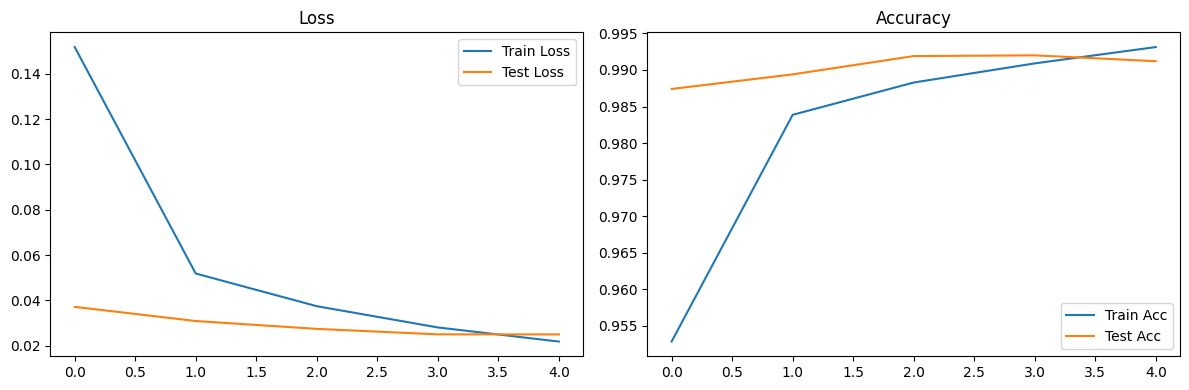

In [45]:
plot_training_history(simple_history)

In [27]:
residual_cnn = CNNWithResidual(input_channels=1, num_classes=10).to(device)
print(f"Residual CNN parameters: {count_parameters(residual_cnn)}")

print("Training Residual CNN...")
residual_history = train_model(residual_cnn, train_loader, test_loader, epochs=5, device=str(device))

Residual CNN parameters: 160906
Training Residual CNN...


100%|██████████| 157/157 [00:10<00:00, 15.45it/s]


Epoch 1/5:
Train Loss: 0.1012, Train Acc: 0.9708
Test Loss: 0.0648, Test Acc: 0.9792
--------------------------------------------------


100%|██████████| 157/157 [00:10<00:00, 15.43it/s]


Epoch 2/5:
Train Loss: 0.0394, Train Acc: 0.9877
Test Loss: 0.0337, Test Acc: 0.9889
--------------------------------------------------


100%|██████████| 157/157 [00:09<00:00, 15.74it/s]


Epoch 3/5:
Train Loss: 0.0295, Train Acc: 0.9907
Test Loss: 0.0356, Test Acc: 0.9891
--------------------------------------------------


100%|██████████| 157/157 [00:10<00:00, 15.29it/s]


Epoch 4/5:
Train Loss: 0.0269, Train Acc: 0.9914
Test Loss: 0.0238, Test Acc: 0.9924
--------------------------------------------------


100%|██████████| 157/157 [00:10<00:00, 14.54it/s]

Epoch 5/5:
Train Loss: 0.0227, Train Acc: 0.9928
Test Loss: 0.0456, Test Acc: 0.9861
--------------------------------------------------


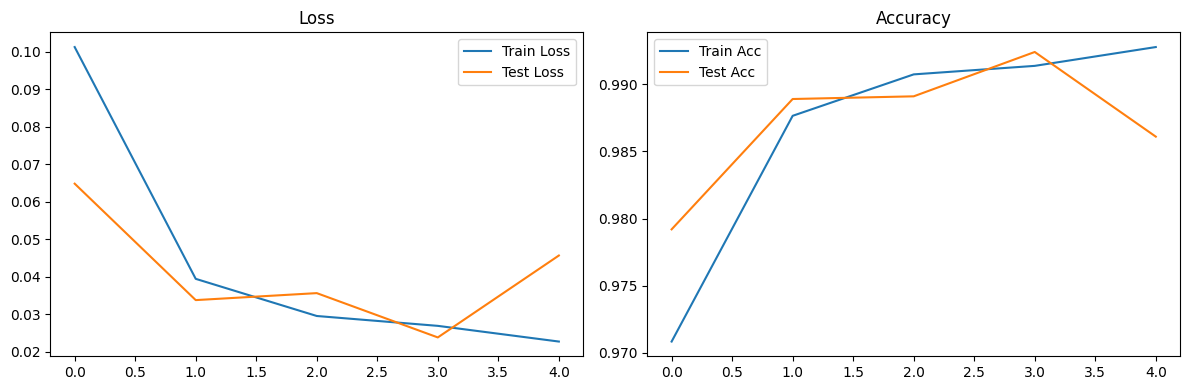

In [46]:
plot_training_history(residual_history)


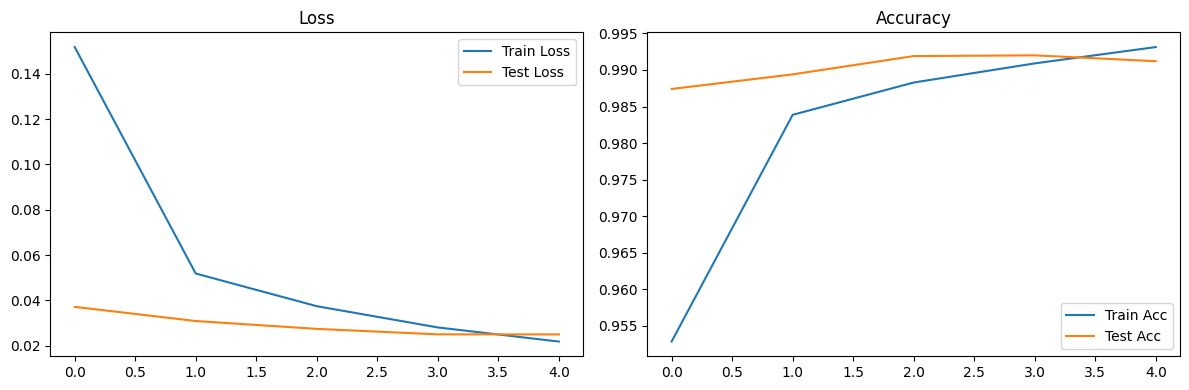

In [30]:
plot_training_history(simple_history)


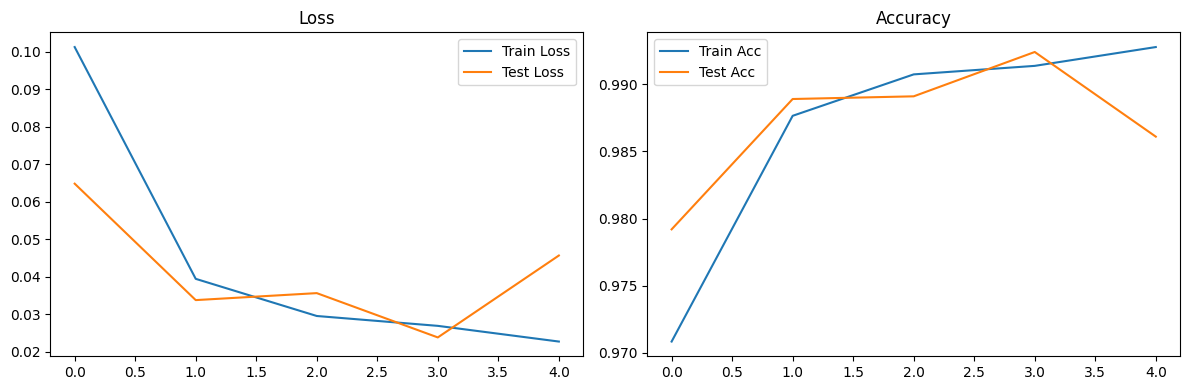

In [31]:
plot_training_history(residual_history)

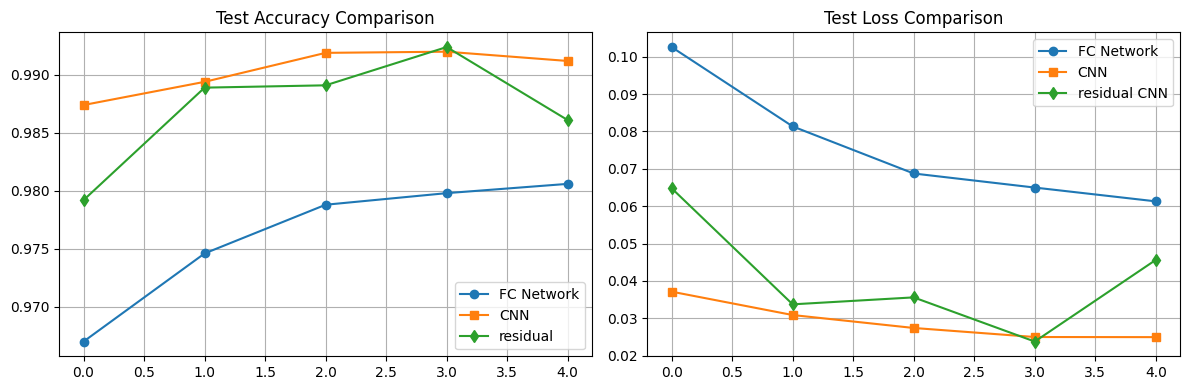

In [47]:
def compare_models(fc_history, cnn_history, residual_history):
    """Сравнивает результаты графики"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(fc_history['test_accs'], label='FC Network', marker='o')
    ax1.plot(cnn_history['test_accs'], label='CNN', marker='s')
    ax1.plot(residual_history['test_accs'], label='residual', marker='d')
    ax1.set_title('Test Accuracy Comparison')
    ax1.legend()
    ax1.grid(True)
    
    ax2.plot(fc_history['test_losses'], label='FC Network', marker='o')
    ax2.plot(cnn_history['test_losses'], label='CNN', marker='s')
    ax2.plot(residual_history['test_losses'], label='residual CNN', marker='d')
    ax2.set_title('Test Loss Comparison')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show() 
    
    
compare_models(FC_history, simple_history, residual_history) 

In [55]:
print(f'FC-Model max accuracy: {max(FC_history['test_accs'])}')
print(f'Simple CNN max accuracy: {max(simple_history['test_accs'])}')
print(f'Residual CNN max accuracy: {max(residual_history['test_accs'])}')

FC-Model max accuracy: 0.9806
Simple CNN max accuracy: 0.992
Residual CNN max accuracy: 0.9924


FC-Model parameters: 569226
Simple CNN parameters: 421642
Residual CNN parameters: 160906


FC-Model обучалась 1 минуту и 46 секунд
Simple CNN обучалась 3 минуты и 52 секунды
Residual CNN обучалась 14 минут и 29 секунд


Модели Simple CNN и Residual CNN переобучались, но на всех эпохах имели большую точность чем полносвязная сеть.
Самая точная модель - Residual CNN имеет max accuracy: 0.9924 на 3 эпохею


FC-Model max accuracy: 0.9806
Simple CNN max accuracy: 0.992
Residual CNN max accuracy: 0.9924

### 1.2 Сравнение на CIFAR-10 (20 баллов)
```python
# Сравните производительность на CIFAR-10:
# - Полносвязная сеть (глубокая)
# - CNN с Residual блоками
# - CNN с регуляризацией и Residual блоками
# 
# Для каждого варианта:
# - Обучите модель с одинаковыми гиперпараметрами
# - Сравните точность и время обучения
# - Проанализируйте переобучение
# - Визуализируйте confusion matrix
# - Исследуйте градиенты (gradient flow)
```